In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import seaborn as sns

Load data and clean

In [3]:
def load_csv(path:str)->tuple[np.ndarray,np.ndarray]:
    np.random.seed(42)
    dataset=np.genfromtxt(path,delimiter=",")
    np.random.shuffle(dataset)
    x,y=dataset[:,:-1],dataset[:,-1]
    return x,y
dataset=load_csv('iris.csv')





In [4]:
x,y=load_csv('iris.csv')

In [5]:
np.mean(x,axis=0),np.var(x,axis=0)

(array([nan, nan, nan, nan]), array([nan, nan, nan, nan]))

In [6]:
np.nanmean(x,axis=0),np.nanvar(x,axis=0)

(array([ 355.46503497, -280.09189189,    2.95      ,   21.74726027]),
 array([1.73561968e+07, 1.18405444e+07, 1.51049922e+04, 6.11729208e+04]))

In [7]:
x[np.isnan(x)]=3.5

In [8]:
(x>10.0).sum(),(x<0.0).sum()

(4, 2)

In [9]:
x[np.where(np.logical_or(x>10.0,x<0.0))]

array([ -1111.,    100.,   1000.,  50000.,   3000., -42000.])

In [10]:
less_than=np.where(x<0.0)
higher_than=np.where(x>10.0)
less_than,higher_than

((array([  4, 140], dtype=int64), array([2, 1], dtype=int64)),
 (array([14, 27, 28, 62], dtype=int64), array([1, 2, 0, 3], dtype=int64)))

In [11]:
y= np.delete(y,np.where(x<0.0)[0],axis=0)
y= np.delete(y,np.where(x>10.0)[0],axis=0)
x= np.delete(x,np.where(x<0.0)[0],axis=0)
x= np.delete(x,np.where(x>10.0)[0],axis=0)
x.shape,y.shape

((144, 4), (144,))

Train test split

In [38]:
def train_test_split(features:np.ndarray,labels:np.ndarray,test_split_ratio:float):
    test_size=int(len(features)*test_split_ratio)
    train_size=len(features)-test_size
    assert len(features)==test_size+train_size,'Size mismatch!'

    x_train,y_train=features[:train_size,:],labels[:train_size]
    x_test,y_test=features[train_size:,:],labels[train_size:]
    return(x_train,y_train,x_test,y_test)




In [39]:
x_train,y_train,x_test,y_test=train_test_split(x,y,0.20)

Distance

In [40]:
def euclidean(points,element_of_x):
    print(points.shape,element_of_x.shape)
    return np.sqrt(np.sum((points-element_of_x)**2,axis=1))

Predict

In [41]:
def predict(x_train:np.ndarray,y_train:np.ndarray,x_test:np.ndarray,k:int) -> np.ndarray:
    labels_pred = []
    for x_test_element in x_test:
        distances = euclidean(x_train,x_test_element)
        distances = np.array(sorted(zip(distances,y_train)))
        label_pred = mode(distances[:k,1],keepdims=False).mode
        labels_pred.append(label_pred)
    return np.array(labels_pred,dtype=np.int32)

In [45]:
y_preds=predict(x_train,y_train,x_test,3)

(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)
(116, 4) (4,)


Metrics

In [43]:
def accuracy(y_test,y_preds):
    true_positive=(y_test==y_preds).sum()
    return true_positive/len(y_test)*100

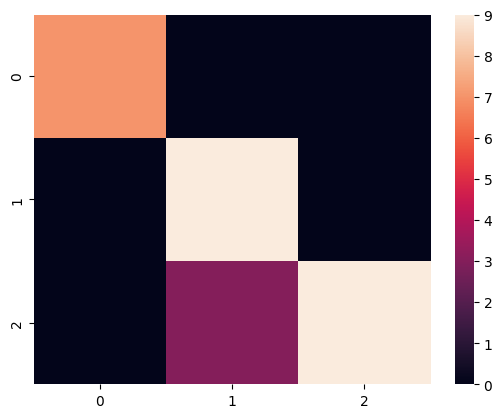

In [47]:
def plot_confusion_matrix(y_test,y_preds):
    conf_matrix=confusion_matrix(y_test,y_preds)
    sns.heatmap(conf_matrix)

plot_confusion_matrix(y_test,y_preds)